# Assignment 4
## Due May 21 at 14:00

Please do not chance any provided variable name. Read carefully the instructions in the exercise PDF and in this notebook. Add your solutions at `YOUR CODE HERE` and remove the corresponding `raise NotImplementedError()`.
Before submitting: Please make sure, that your notebook can be executed from top to bottom without an error (Menu -> Kernel -> Restart & Run all). 

This is just because some defaults of sklearn will change in the next version and because the linear SVN does not converge in time. Without them one gets a lot of warnings.

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

np.random.seed(42)

## Exercise 1

### a)

In [3]:
candies = pd.read_csv("candy-data.csv")

# create the variables names, xs, ys
names = candies["competitorname"].values
xs = candies.drop(["competitorname", "chocolate"], axis=1).to_numpy()
ys = candies["chocolate"].to_numpy()

In [4]:
# split (xs, ys) into (xs_train, ys_train) and (xs_test, ys_test)
n = int(xs.shape[0] * 2 / 3)

xs_train = xs[:n]
xs_test = xs[n:]

ys_train = ys[:n]
ys_test = ys[n:]

### b)

In [5]:
model = LogisticRegression()
model.fit(xs_train, ys_train)

pred = model.predict(xs_test)
acc = np.mean(pred == ys_test)

print(f"Accuracy: {acc:.3f}")

# model = LogisticRegression()
# model.fit(xs_train, ys_train)

# acc = model.score(xs_test, ys_test)

# print(f"Accuracy: {acc:.3f}")

Accuracy: 0.690


### c)

In [8]:
Cs =  [0.001, 0.01, 0.1, 1, 10, 100, 1000]

Until the next version of sklearn (0.22) we need to set iid to false otherwise it does not work like the CV presented in the slides.
More here https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Training errors
   0.00 | 0.107
   0.01 | 0.123
   0.10 | 0.090
   1.00 | 0.037
  10.00 | 0.053
 100.00 | 0.053
1000.00 | 0.053

Test errors
   0.00 | 0.414
   0.01 | 0.448
   0.10 | 0.414
   1.00 | 0.310
  10.00 | 0.241
 100.00 | 0.241
1000.00 | 0.241



C:\Users\Maverick\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


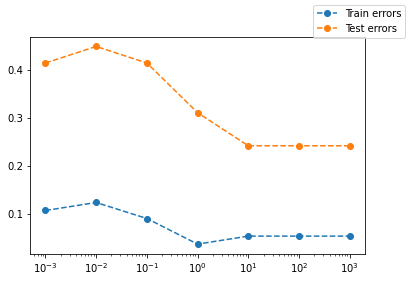

In [9]:
# Run cross validation using GridSearchCV

# Compute cross validation error
clf = GridSearchCV(model, {"C": Cs}, cv=10)
clf.fit(xs_train, ys_train)

train_errors = 1 - np.array(clf.cv_results_["mean_test_score"])

print("Training errors")
for i, error in enumerate(train_errors):
    print(f"{Cs[i]:7.2f} | {error:.3f}")
print()
    
# Compute test error
test_scores = []
for c in Cs:
    clf = LogisticRegression(C=c)
    clf.fit(xs_train, ys_train)
    score = clf.score(xs_test, ys_test)
    test_scores.append(score)
    
test_errors = 1 - np.array(test_scores)

print("Test errors")
for i, error in enumerate(test_errors):
    print(f"{Cs[i]:7.2f} | {error:.3f}")
print()

# Plot results in new figure
fig, axis = plt.subplots(1)

axis.plot(Cs, train_errors, '--o', label="Train errors")
axis.plot(Cs, test_errors, '--o', label="Test errors")
axis.set_xscale("log")
fig.legend()
fig.savefig("fig")
fig.show()

### d) Comment. Does CV choose the best C? How do different values of C compare with respect to over/underfitting? Does the optimal C change if you run the code again? 

- The value of $C$ that yield the minimum training error is ($1$). But, The minimum test error occurs for 3 different values of  $C = 10, 100, 1000$. Therefore, the cross validation doesn't choose the best $C$. All the values for $C$ are overfitted because for all of them the training erros is lower than the test error. We can also observe that $C = 0.10$ is the one with most overfitting.
- If we re-run the code, the best $C$ does not change. 